# Plot HexLattice with RingCoordinate

This notebook is intended to demonstrate the basic features of HexLatticePlot.

In [1]:
from pprint import pprint
from pathlib import Path

import numpy as np
import matplotlib.pylab as plt
import matplotlib.colors as mcolors
from matplotlib.axes._axes import Axes

from HexLattice import RingCoordinate, HexLattice, HexCell, PlotConfig

## Defining Basic Information


In [2]:
pc = PlotConfig('FiveRings')
pc.image_root_dir = Path('examples/plot')
pc.image_type = 'png'
pc.plot_style = 'bmh'

In [3]:
ring_coord_list = RingCoordinate.get_all_coord_by_r(3)
hl = HexLattice([HexCell(ring_coord) for ring_coord in ring_coord_list])
for hex_cell in hl.HexCells:
    hex_cell.text = f'({round(hex_cell.ring.r)}, {round(hex_cell.ring.k)})'

In [4]:
fig = plt.figure(figsize=(15, 15))
ax: Axes = fig.subplots()
hl.plot_hex(pc, ax)
fig.savefig(pc.image_path)
plt.close()

In [5]:
pc = PlotConfig('FiveRingsValued')
pc.image_root_dir = Path('examples/plot')
pc.image_type = 'svg'
pc.plot_style = 'bmh'

In [6]:
v = np.random.random(19) * 10

In [7]:
ring_coord_list = RingCoordinate.get_all_coord_by_r(2)
hl = HexLattice([HexCell(ring_coord) for ring_coord in ring_coord_list])
for i, hex_cell in enumerate(hl.HexCells):
    hex_cell.value = v[i]

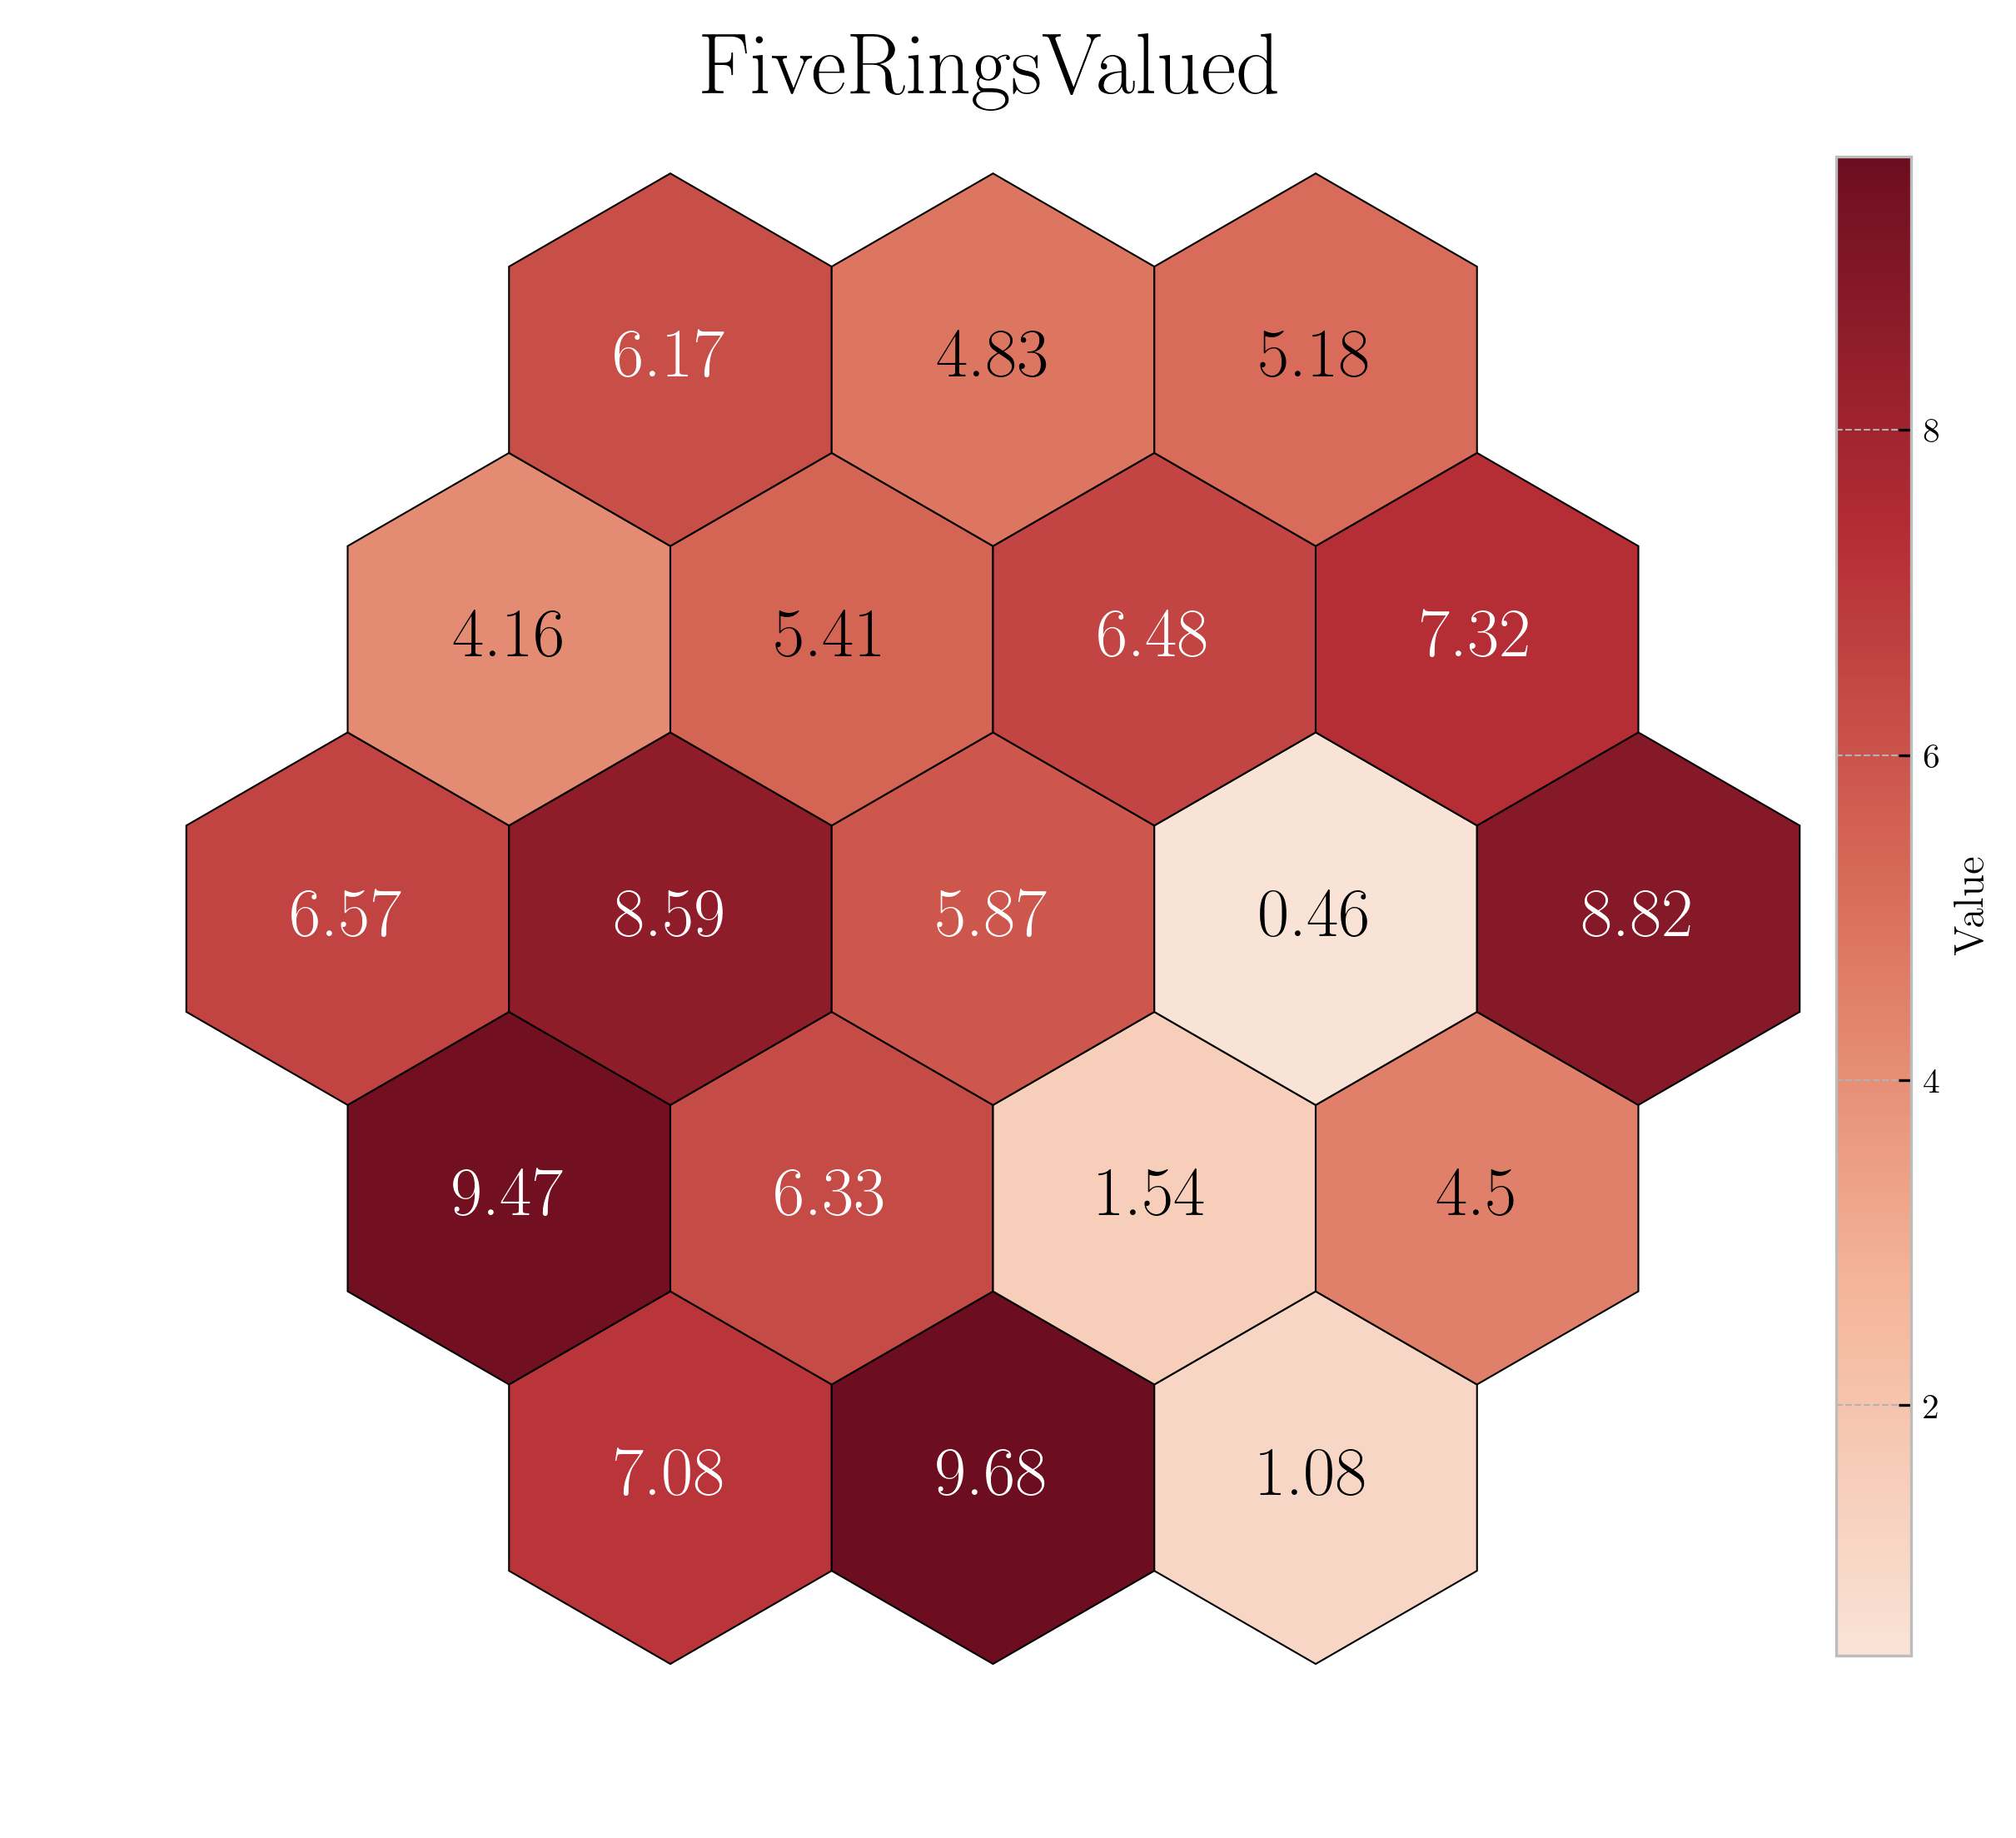

In [18]:
fig = plt.figure(figsize=(10, 10))
ax: Axes = fig.subplots()
ax2 = hl.plot_hex(pc, ax)

cb_ax = fig.add_axes([0.85, 0.2, 0.03, 0.6])
cbar = fig.colorbar(hl.mappable(pc), cb_ax)
cbar.set_label('Value')
fig.savefig(pc.image_path)
